In [6]:
import skimage.io as io
import pickle
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from utils import *
import scipy.io as sio
import matplotlib.pyplot as plt
from code_eval import code


data_directory = "D:\\DATASET\\IRMA\\"

In [7]:
df_train = pd.read_csv(
    f"{data_directory}ImageCLEFmed2009_train_codes.02.csv", sep=";", index_col="image_id")
df_train = df_train

label_encoder = LabelEncoder()

label_encoder.fit(df_train["irma_code"].unique())
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

In [8]:
train_images, train_ids = load_images(
    f"{data_directory}\\ImageCLEFmed2009_train\\")

test_images, test_ids = load_images(
    f"{data_directory}\\ImageCLEFmed2009_test.03\\")


train_data = list(zip(train_images, train_ids))
train_data.sort(key=lambda tup: tup[1])

images = np.vstack(list(map(lambda n: np.expand_dims(
    resize_image(process(n[0])), axis=0), train_data)))
train_ids = list(map(lambda n: n[1], train_data))

df_train = pd.read_csv(
    f"{data_directory}ImageCLEFmed2009_train_codes.02.csv", sep=";", index_col="image_id")
df_train = df_train.loc[train_ids].sort_index()


train_data_to_save = {}
train_data_to_save["images"] = images
train_data_to_save["ids"] = train_ids
train_data_to_save["irma_code"] = df_train["irma_code"].values

test_data = list(zip(test_images, test_ids))
test_data.sort(key=lambda tup: tup[1])

images = np.vstack(list(map(lambda n: np.expand_dims(
    resize_image(process(n[0])), axis=0), test_data)))
test_ids = list(map(lambda n: n[1], test_data))

df_test = pd.read_csv(
    f"{data_directory}ImageCLEFmed2009_test_codes.03.csv", sep=";", index_col="image_id")
df_test = df_test.loc[test_ids].sort_index()


test_data_to_save = {}
test_data_to_save["images"] = images
test_data_to_save["ids"] = test_ids
test_data_to_save["irma_code"] = df_test["irma_code"].values

In [9]:
sio.savemat("train_data.mat", train_data_to_save)
sio.savemat("test_data.mat", test_data_to_save)

In [10]:
train_data_to_save["images"].shape

(12677, 300, 300, 3)

[['x-ray', 'plain radiography', 'analog', 'overview image'], ['sagittal', 'lateromedial', 'unspecified'], ['upper extremity (arm)', 'elbow', 'right elbow'], ['musculosceletal system', 'unspecified', 'unspecified']]


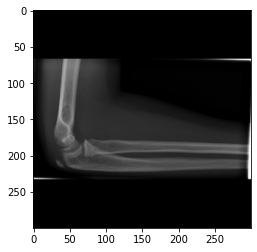

[['x-ray', 'plain radiography', 'analog', 'overview image'], ['other orientation', 'left anterior oblique (LAO)', 'unspecified'], ['chest', 'bones', 'left ribs'], ['musculosceletal system', 'unspecified', 'unspecified']]


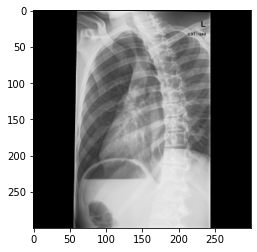

In [14]:
# sanity check
evaluator = code("codes.txt")

plt.imshow(train_data_to_save["images"][9200])
print(evaluator.CodeToText(train_data_to_save["irma_code"][9200]))

plt.show()
plt.imshow(test_data_to_save["images"][4])
print(evaluator.CodeToText(test_data_to_save["irma_code"][4]))